In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
#template  = Image.open('Assignment1/Data/trailerSlightlyBigger.png').convert('L')
#template = Image.open('Data/trailer.png').convert('L')
#image = Image.open('Assignment1/Data/u2cuba.jpg').convert('L')


template = Image.open('Assignment1/Data/self_photo.png').convert('L')
image = Image.open('Assignment1/Data/group_photo.png').convert('L')

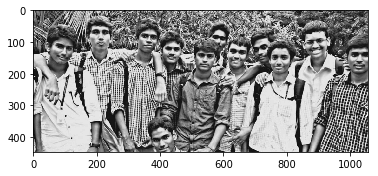

In [3]:
plt.imshow(image,cmap='gray')

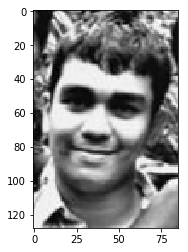

In [4]:
plt.imshow(template,cmap='gray')

In [5]:
image = np.asarray(image)
template = np.asarray(template)
#image=image/255
#template=template/255
image = (image- image.mean())/ (np.std(image))
template = (template-template.mean())/(np.std(template))
print(image.shape," ",template.shape)

(447, 1056)   (128, 85)


In [6]:
def cross_corelation(image, filters):
    fig=plt.figure()
    # perform cross_correlation between image and filter
    output = np.zeros(shape=((image.shape[0]-(filters.shape[0])+1),(image.shape[1]-(filters.shape[1])+1)))
    #output = np.zeros(shape=(image.shape[0],image.shape[1]))
    print("Output shape is ",output.shape)
    k1= (int)((filters.shape[0]-1)/2)
    rem1= filters.shape[0]-(2*k1)
    k2= int((filters.shape[1]-1)/2)
    rem2= filters.shape[1]-(2*k2)
    for i in range(k1,image.shape[0]-k1-1):
        for j in range(k2,image.shape[1]-k2-1):
            image_area= image[i-k1:i+k1+rem1,j-k2:j+k2+rem2]
            temp = np.multiply(image_area,filters)
            temp_sum = np.sum(temp)
            output[i-k1,j-k2]=temp_sum
    return output

In [7]:
imageOut=cross_corelation(image, template)

Output shape is  (320, 972)


<Figure size 432x288 with 0 Axes>

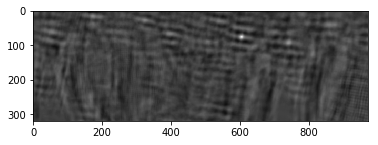

In [8]:
plt.imshow(imageOut,cmap='gray')